# Non-Text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,65%,4.1,4
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,65%,4.1,4
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,65%,4.1,4


In [3]:
print(products.shape)
print(products.info())

(10348, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10101 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null float64
repurchase    10348 non-null object
packaging     10348 non-null float64
price         10348 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 808.5+ KB
None


In [4]:
# Check for presence of NaN values
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [5]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

index         0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [6]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5330
Blush - Deep Throat    1165
Blush - Sin             765
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [7]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
ruby_tea_roses       9
tenderheart003       9
izzybella            9
stilagrrrl           8
GimpyPoop            8
Katie75007           8
pakirani             8
syeung2              8
Hothead              7
Cygentte3            7
pmnixa               7
bunny207             7
LaciP504             7
ashergill            7
JessiDayle           7
MsPsylocke           7
sarahfeeni           7
DanielleWilliams     7
trempot              7
fabs162              6
mriaow               6
cgw1                 6
schminken            6
scarlett1975         6
delhi                6
lilylotus            6
                    ..
Rabmonk006           1
tokiboom             1
Sharwex              1
beesknees            1
staceyrella          1
manda9794            1
pinkcoconut          1
akneil               1
tazzyface            1
msdixiemom           1
ChicagoSandy         1
saratayte            1
cardiacarre

In [8]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1281
12 years ago     1248
10 years ago     1143
13 years ago      860
9 years ago       759
17 years ago      759
16 years ago      746
14 years ago      689
15 years ago      654
18 years ago      575
8 years ago       537
7 years ago       368
6 years ago       238
5 years ago       134
19 years ago      121
4 years ago        98
3 years ago        52
2 years ago        33
20 years ago       20
a year ago         17
6 months ago        4
10 months ago       3
7 months ago        2
9 months ago        2
a month ago         2
2 months ago        1
5 months ago        1
4 months ago        1
Name: date, dtype: int64

In [9]:
products['price'].value_counts()
# Drop this feature because not useful

4    10348
Name: price, dtype: int64

In [10]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5562
4.0    2392
3.0    1403
2.0     672
1.0     319
Name: ratings, dtype: int64

In [11]:
products['age'].value_counts()

19-24        3994
25-29        2538
30-35        1600
36-43         873
Under 18      872
44-55         383
56 & Over      88
Name: age, dtype: int64

In [12]:
products['packaging'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

4.1    5579
4.2    2351
4.3    2108
4.4     310
Name: packaging, dtype: int64

In [13]:
products['repurchase'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

65%    5330
79%    1489
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [14]:
# Convert numeric columns to categorical
products['ratings'] = products['ratings'].astype(str)
products['packaging'] = products['packaging'].astype(str)

# Check if they are converted correctly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10348 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null object
repurchase    10348 non-null object
packaging     10348 non-null object
price         10348 non-null int64
dtypes: int64(2), object(8)
memory usage: 808.5+ KB


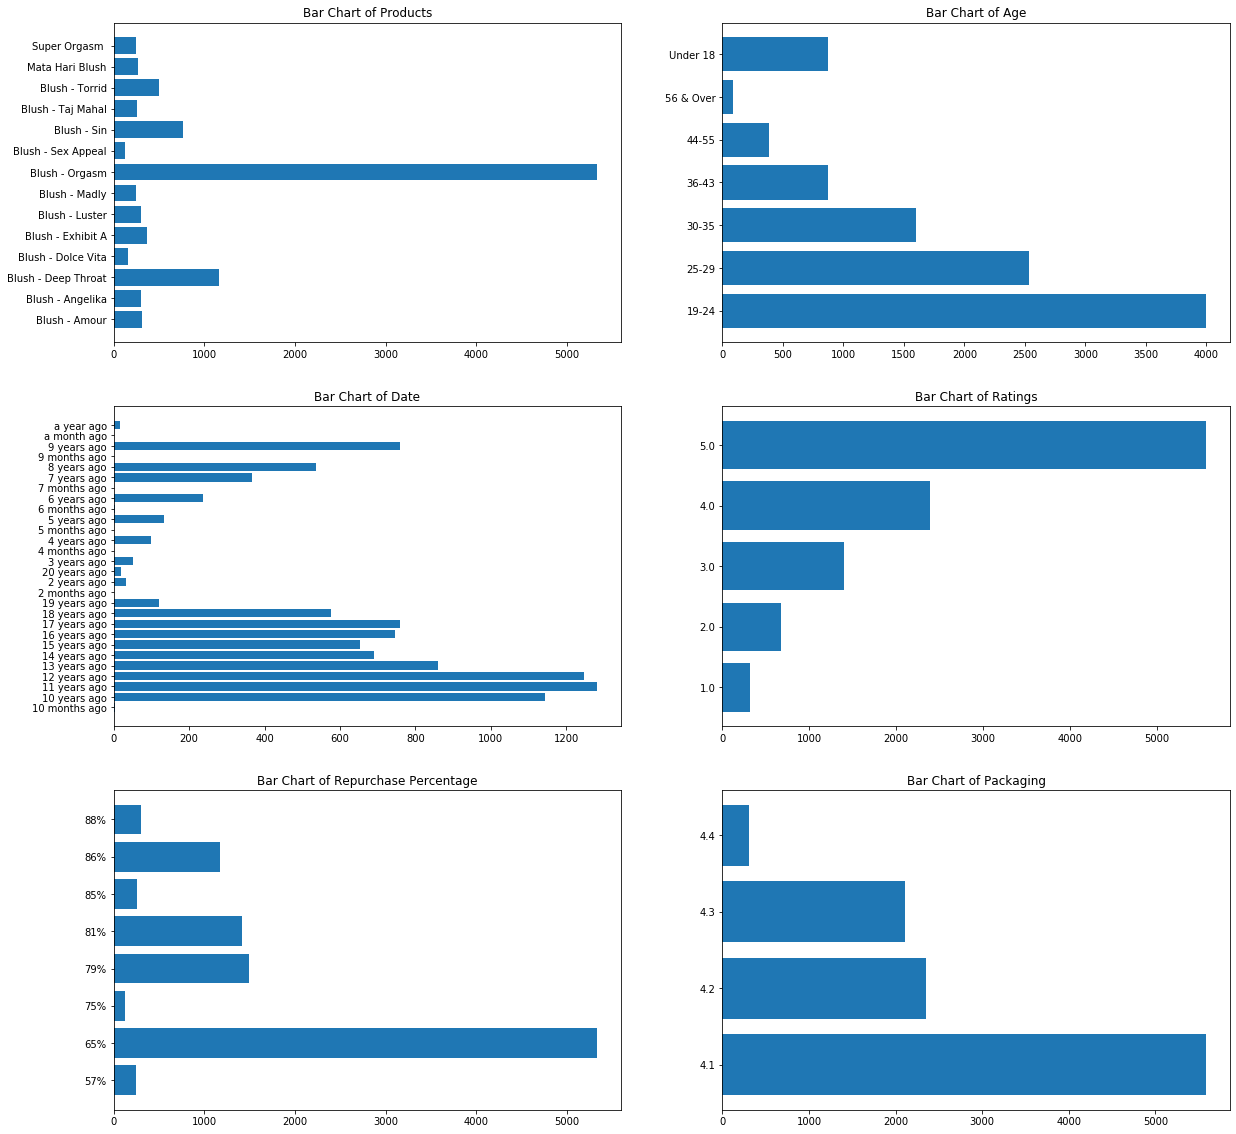

In [15]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].value_counts().sort_index().index,products['packaging'].value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text

In [16]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [17]:
# Check for random sample of reviews
products['review'].sample(n=10)

3801    This is a fabulous blush! After reading all th...
7424    Like others have said, this is really not a pi...
9677    Love. I couldn't resist the color and the name...
8506    I was recommended to try this product due to m...
5406    Gorgeous pink/peachy flush colour, it truly is...
7794    This blush is so disappointing because the col...
2827    This blush is very pretty and gives a natural ...
8696    I saw reviews from your guys & bought one. It ...
6282    I wondered what all the hype was about, so I d...
6687    Me: NC15/ Chanel 0.5 Faience/ Dior 010.  This ...
Name: review, dtype: object

count    10348.000000
mean       185.288268
std         32.466639
min          1.000000
25%        194.000000
50%        197.000000
75%        199.000000
max        200.000000
Name: review_length, dtype: float64


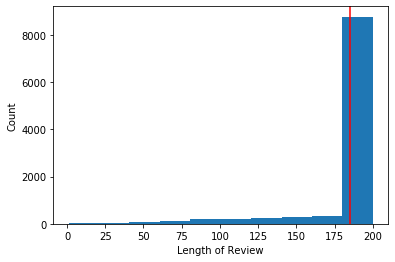

In [18]:
products['review_length'] = products['review'].apply(lambda x: len(x))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis

In [19]:
# Check for reviews with only length 1
products[products['review_length'] == 1]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
463,693,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,1


In [20]:
# Remove the review 
products = products[products['review_length'] > 1]

In [21]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [22]:
products['english'].value_counts()

True     10322
False       25
Name: english, dtype: int64

In [23]:
# Check for random sample of Non-English reviews
products[products['english'] == False].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
1329,1989,Blush - Orgasm,anairam1980,30-35,10 years ago,Best blush ever!,5.0,65%,4.1,4,16,False
5130,7696,Blush - Orgasm,nars37,Under 18,18 years ago,Ug does not work for asian skin.. looks too or...,1.0,65%,4.1,4,55,False
1014,1519,Blush - Orgasm,Krimlight,Under 18,9 years ago,Rientra assolutamente nella lista dei miei 3 b...,5.0,65%,4.1,4,195,False
3965,5945,Blush - Orgasm,Acnetha,Under 18,15 years ago,its ok,3.0,65%,4.1,4,6,False
3065,4595,Blush - Orgasm,car123,19-24,13 years ago,love it!,5.0,65%,4.1,4,8,False


In [24]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
194,289,Blush - Orgasm,MymyD,25-29,5 years ago,"Been loving it for years. It is expensive, but...",5.0,65%,4.1,4,98,True
4440,6660,Blush - Orgasm,Romie,30-35,16 years ago,"Not too pink, not to orange, love this color, ...",5.0,65%,4.1,4,159,True
882,1322,Blush - Orgasm,Rebeccaxx24,19-24,9 years ago,I think I've found the only blusher I will eve...,5.0,65%,4.1,4,194,True
10205,15326,Blush - Torrid,jeannean,36-43,16 years ago,"Of all the Nars blushes I've tried, this is my...",5.0,86%,4.2,4,200,True
3122,4682,Blush - Orgasm,retro_diva,30-35,13 years ago,I'm one of those people that Orgasm actually w...,4.0,65%,4.1,4,193,True


In [25]:
# Drop Non-English reviews
products = products[products['english'] == True].drop(['english'], axis=1)

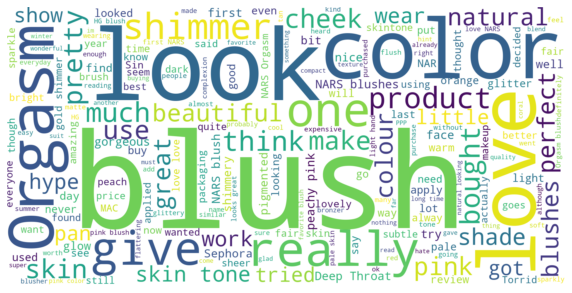

In [26]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

,word,occurences
903,I,9619.0
1787,a,5866.0
1931,and,5330.0
5729,the,4872.0
3866,it,4308.0
3859,is,3707.0
5751,this,3602.0
5796,to,2885.0
2332,but,2813.0
4310,my,2710.0
